**Title:** Life Expectancy Trajectories and Associated Health Indicators among Countries: Temporal Representations of Countries via Deep Learning Architectures

**Introduction:** This deep learning class assignment examines potential patterns in global health by evaluating the evolution of life expectancy and related indicators across countries from 2000 to 2015. The original data I used in this assignment was retrieved from WHO and UN sources. It consists of longitudinal data on demographic, economic, and health system variables.

**Purpose Statement:** My main purpose with this assignment is to apply and compare multiple deep learning architectures (Multilayer Perceptrons [MLPs], Long Short-Term Memory networks [LSTMs], and Autoencoders) to learn  temporal representations of countries based on their life expectancy trajectories and associated health factors. These temporal representations are used for unsupervised clustering to uncover latent health evolution patterns. Basically, I implemented both deep learning methods as well as unsupervised machine learning methods, which aligns with the learning objective of this assignment, specifically working on perceptrons, sequence modeling, optimization strategies, regularization techniques, and unsupervised learning using Keras. Although I use a publicly available dataset from Kaggle, it does not replicate existing Kaggle kernels. Instead, I used new and novel research question focused on learning country-level health trajectory using unsupervised deep learning. The implementation includes custom preprocessing, LSTM Autoencoders, and clustering of latent representations, which go beyond typical regression approaches found in other notebooks.

**Research Question:** Can deep learning models uncover hidden clusters of countries based on how their life expectancy and health indicators evolve over time?

**Disclaimer:** This assigment is conducted purely for educational purposes as part of a deep learning course. The analyses, models, and interpretations presented herein do not constitute official health policy, medical advice, or epidemiological conclusions. I am not responsible for any decisions or outcomes based on the contents of this notebook. The data was retrieved from this website: https://www.kaggle.com/datasets/vrec99/life-expectancy-2000-2015/data.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-2000-2015/Life_Expectancy_00_15.csv


In [2]:
#Step 1: Exploratory Data Analysis
#1a. Relevant Factors for the Project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1a1. Data 
df = pd.read_csv('/kaggle/input/life-expectancy-2000-2015/Life_Expectancy_00_15.csv', sep=';')

#1a2. Relevant features
print("Shape of the dataset:", df.shape)
df.head()

Shape of the dataset: (1904, 17)


,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [3]:
#1b: Subset of data and descriptive stats
features = [
    'Life Expectancy', 'Population', 'CO2 emissions', 'Health expenditure',
    'Electric power consumption', 'Forest area', 'GDP per capita',
    'Individuals using the Internet', 'Military expenditure',
    'People practicing open defecation',
    'People using at least basic drinking water services',
    'Obesity among adults', 'Beer consumption per capita'
]

#1b1. descriptive statistics
summary_stats = df[features].describe().T
summary_stats = summary_stats.rename(columns={'50%': 'Median'})
summary_stats = summary_stats[['count', 'mean', 'std', 'min', '25%', 'Median', '75%', 'max']]

#1b2. Unique country count
print("Unique countries:", df['Country'].nunique())
print("Unique years:", df['Year'].nunique())

#1b3. table
summary_stats
pd.set_option('display.float_format', lambda x: '%.2f' % x)
summary_stats

Unique countries: 119
Unique years: 16


,count,mean,std,min,25%,Median,75%,max
Life Expectancy,1904.00,70.82,8.49,43.06,66.86,73.01,76.77,83.23
Population,1904.00,50755831.74,165024724.12,333166.00,4218751.00,10769182.50,36921235.75,1379860000.00
CO2 emissions,1904.00,5.36,6.22,0.03,1.00,3.55,7.63,50.95
Health expenditure,1904.00,6.10,2.45,0.41,4.21,5.86,7.88,16.52
Electric power consumption,1904.00,3795.91,4546.58,22.76,605.28,2143.66,5407.22,25590.69
Forest area,1904.00,30.55,20.86,0.00,11.63,30.89,46.67,91.98
GDP per capita,1904.00,18094.11,19389.83,434.84,4614.71,11155.01,26366.81,141634.70
Individuals using the Internet,1904.00,29.74,27.77,0.00,5.00,20.00,51.82,96.81
Military expenditure,1904.00,2.21,2.97,0.00,1.09,1.53,2.41,32.66
People practicing open defecation,1904.00,9.51,17.35,0.00,0.00,0.75,10.50,86.80


**Descriptive Statistics Interpretation:** The table above provided a summary of key demographic, health, and development indicators across 119 countries over 16 years (2000–2015), resulting in 1,904 total country-year observations. This table aggregated across time to help us have a general understanding of feature distributions before deeper temporal analysis.

In [4]:
#1c. Columns missing data
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_summary = missing_summary[missing_summary > 0]

#1c1. Percentage of missing values
missing_percent = (missing_summary / len(df)) * 100

#1c2. Summary dataframe
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_percent.round(2)
})

#1c3. Display
missing_df

,Missing Count,Missing %


**Missing Data Interpretation:** This data was full and complete with no missing data at all. As a result, I did not conduct any imputation.

In [5]:
#1d. Outliers
#1d1. Detect outliers using IQR
numeric_features = [
    'Life Expectancy', 'Population', 'CO2 emissions', 'Health expenditure',
    'Electric power consumption', 'Forest area', 'GDP per capita',
    'Individuals using the Internet', 'Military expenditure',
    'People practicing open defecation',
    'People using at least basic drinking water services',
    'Obesity among adults', 'Beer consumption per capita'
]

# Outlier detection
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return len(outliers), round(len(outliers)/len(data) * 100, 2)
    
outlier_summary = {}
for col in numeric_features:
    count, percent = detect_outliers_iqr(df, col)
    outlier_summary[col] = {'Outlier Count': count, 'Outlier %': percent}

#1d2. DataFrame
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='Outlier %', ascending=False)
outlier_df


,Outlier Count,Outlier %
People practicing open defecation,245.00,12.87
People using at least basic drinking water services,182.00,9.56
Population,180.00,9.45
Electric power consumption,144.00,7.56
Military expenditure,138.00,7.25
CO2 emissions,91.00,4.78
Life Expectancy,80.00,4.20
GDP per capita,68.00,3.57
Health expenditure,15.00,0.79
Forest area,0.00,0.00


**Outliers Analysis:** I checked outliers with the IQR (Interquartile Range) method. The features with the highest percentage of outliers included: people practicing open defecation (12.87%), water access (9.56%), population (9.45%). I decided to keep these variables since this is longitudinal data modeling via using log-transform and scaling all variables with MinMaxScaler. I used log transformation to highly skewed variables that will reduce the impact of extreme scores; and MinMax scaling was used for all numeric features that helped me bring them into a 0–1 range that is ideal for neural networks (MLP, LSTM, Autoencoders).

In [6]:
#1e. Transformation, Standardization, and Normalization
#1e1. log-transform for skewed data
skewed_features = [
    'Population', 'GDP per capita', 'CO2 emissions', 'Electric power consumption'
]

#1e2. Use log1p for skewness and handle zeros
df[skewed_features] = df[skewed_features].apply(lambda x: np.log1p(x))

In [7]:
#1f. MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

#1f1. Scaled data
country_scaled = df.copy()

# Scaling and transforming numeric factors
scaler = MinMaxScaler()
country_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

Standardization Interpretation: I prepped data set to deep learning by applying log-transformation to four skewed variables and scaled all numeric features using [0,1] range via MinMaxScales. This process helped me normalize this dataset for a reliable training of MLP, LSTM, and Autoencoder models, as well as unsupervised clustering.

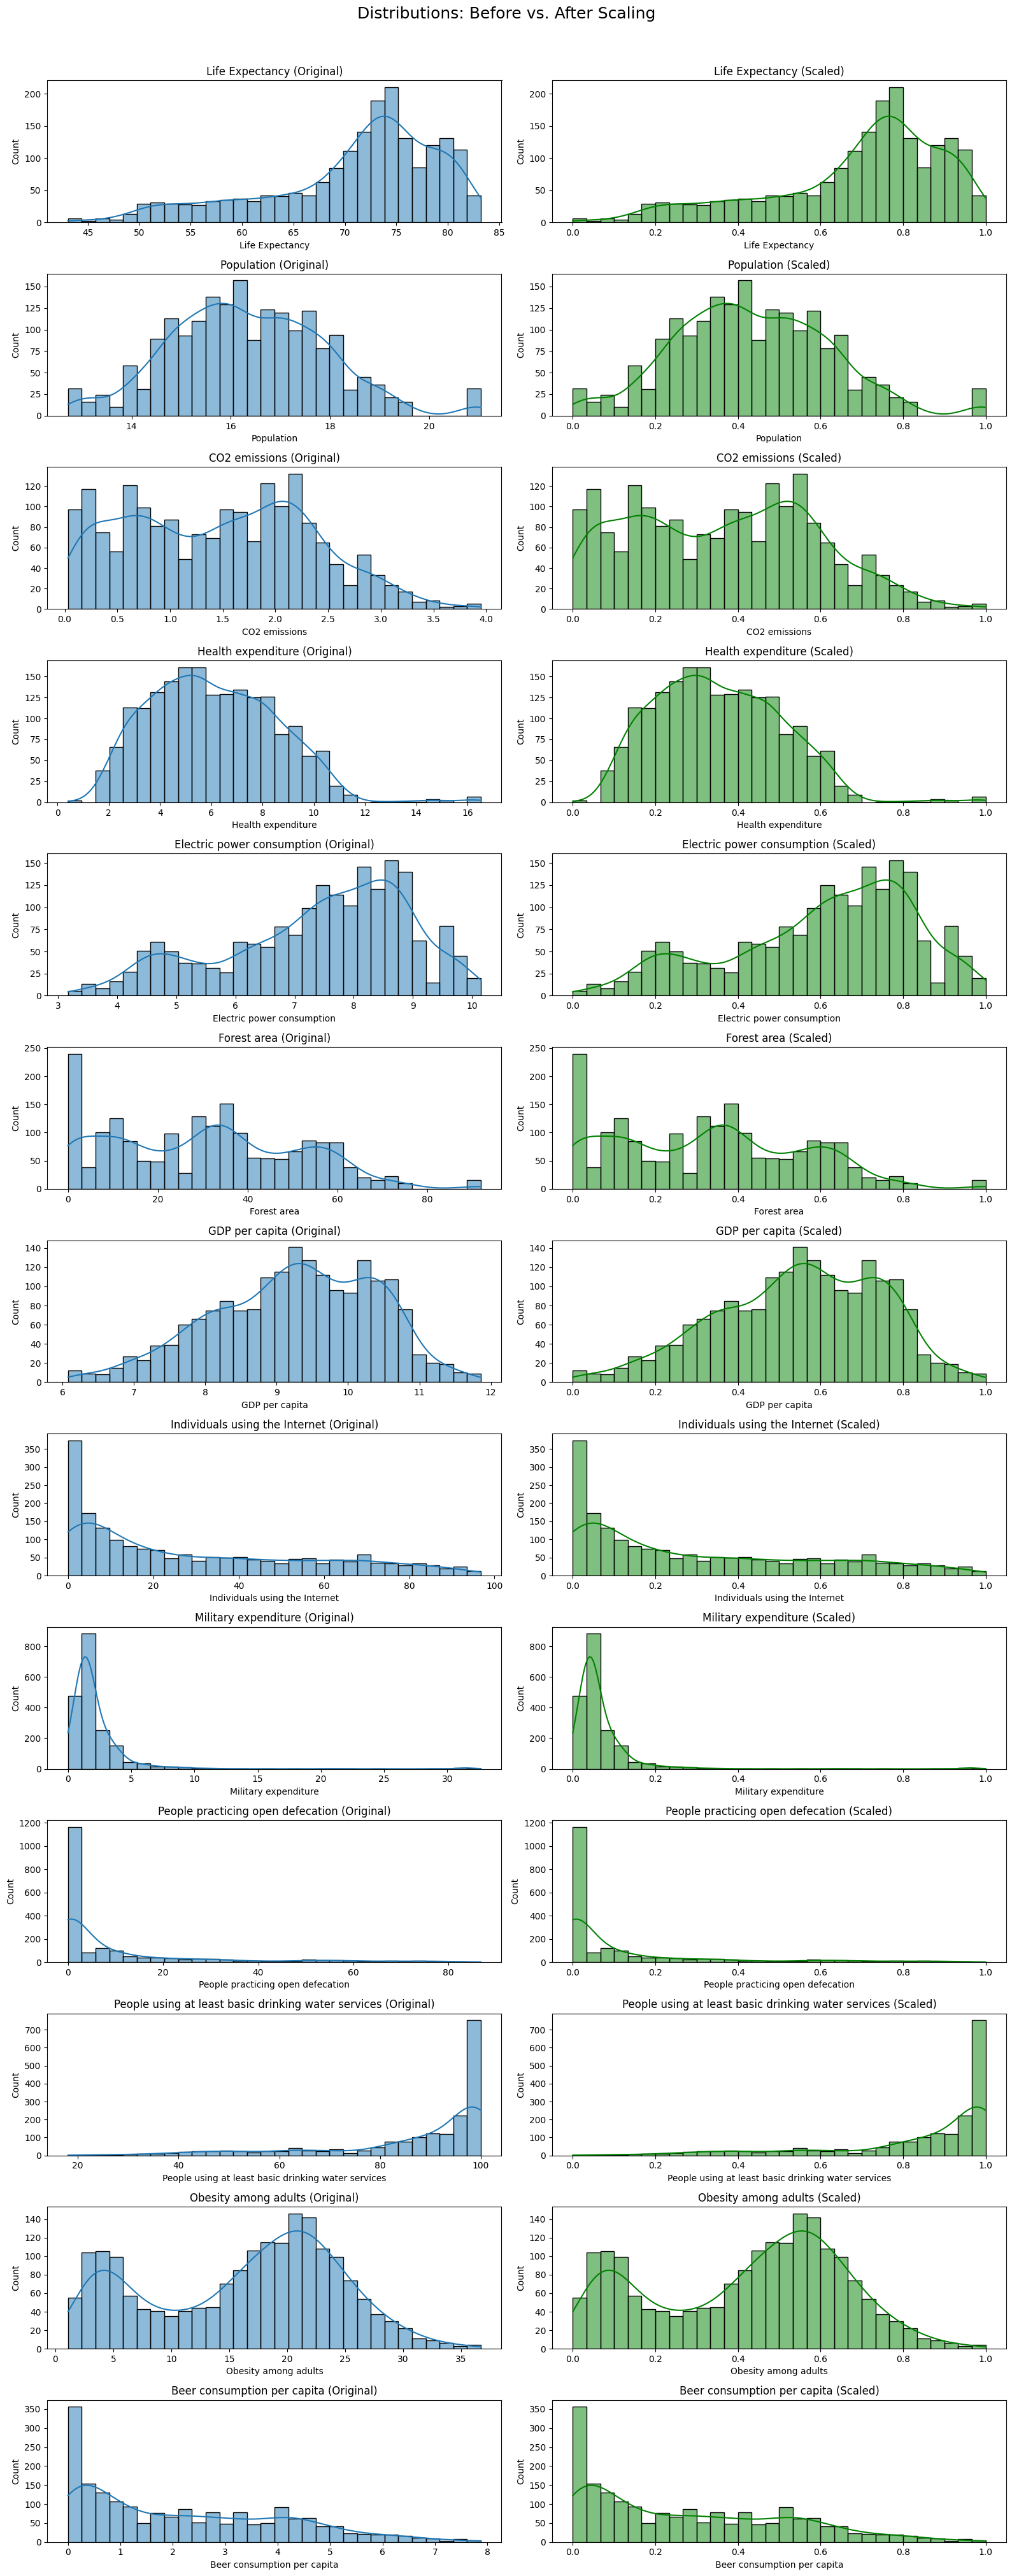

In [8]:
#1g. Data visualization demonstration
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#1g1. Original vs Scaled
fig, axes = plt.subplots(nrows=13, ncols=2, figsize=(16, 40))
fig.suptitle('Distributions: Before vs. After Scaling', fontsize=18, y=1.01)

for i, feature in enumerate(numeric_features):
    # Before scaling (left side)
    sns.histplot(df[feature], bins=30, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{feature} (Original)')
    
    # After scaling (right side)
    sns.histplot(country_scaled[feature], bins=30, ax=axes[i, 1], kde=True, color='green')
    axes[i, 1].set_title(f'{feature} (Scaled)')

plt.tight_layout()
plt.show()


**Histogram Interpretation:** MinMax scaling brought all variables to a uniform range [0, 1] that will be necessary for training deep learning models like MLPs, LSTMs, and Autoencoders. Based on histograms, log transformation improved the distribution of originally skewed variables including population, CO₂ emissions, GDP per capita, and electric power consumption. With transformation, these variables became more symmetrically distributed.

Results also shows that variables like internet usage, military expenditure, open defecation, and water access were still right-skewed even after transformation. This proved that there are real-world health disparities.

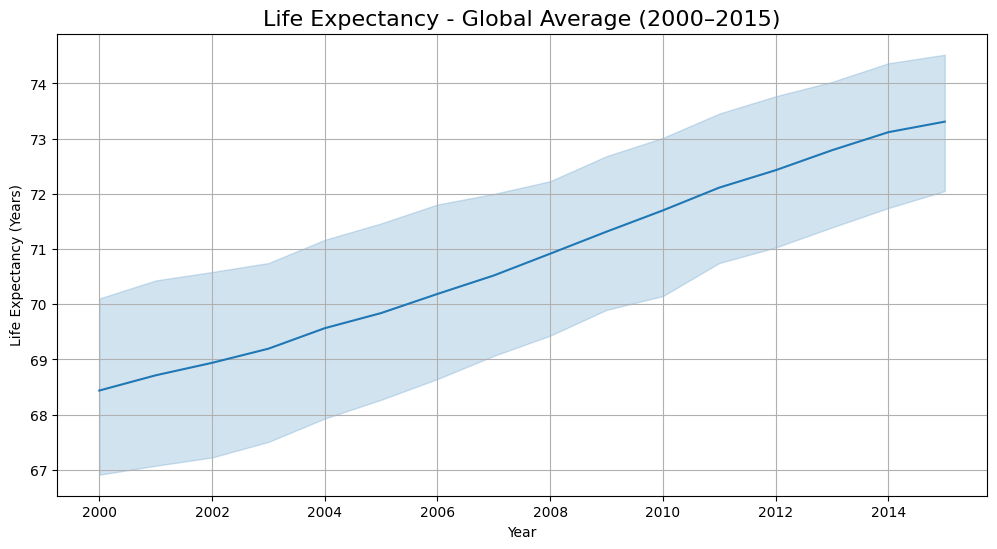

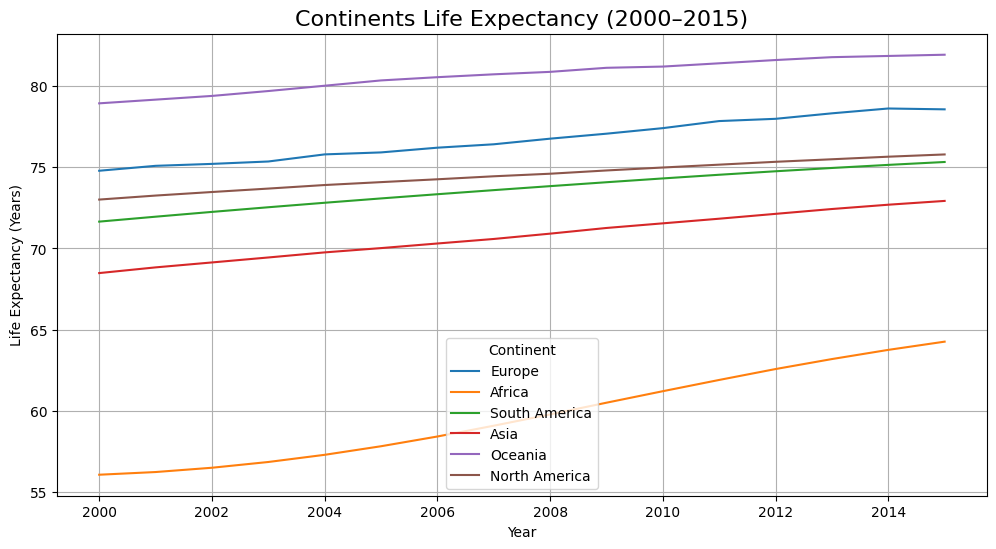

In [9]:
#1h. Overtime Life Expectancy
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life Expectancy')
plt.title('Life Expectancy - Global Average (2000–2015)', fontsize=16)
plt.ylabel('Life Expectancy (Years)')
plt.grid(True)
plt.show()

#1h1. Continent level comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Life Expectancy', hue='Continent', ci=None)
plt.title('Continents Life Expectancy (2000–2015)', fontsize=16)
plt.ylabel('Life Expectancy (Years)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()



**Interpretation of Global Life Expectancy:** Plot 1 with CIs shows that the life expectancy increased over time from around 69 to 74. CIs revealed increasing variation over time that may be the indicator of growing health and life disparities between countries. Overall, this upward trend confirmed that the temporal structure was valid and that longitudinal modeling (e.g., LSTM, GRU) would be appropriate for thus data.

**Interpretation of Life Expectancy by Continents:**  Plot 2 helped me understand Oceania and Europe consistently had the highest life expectancy levels (above 78–80). The data showed that Africa had the lowest but fastest-growing life expectancy trajectory that increased from 56 to ~64 years, which could be partially due to developing health systems. Data also revealed that Asia, South America, and North America had the moderate and stable growth, keeping it around 75–77 years. Overall, there is a global health and life expectancy disparities since even in the best global expectancy, the difference between Oceania and Africa is very clear. 

**Model Implications:** These results let me use sequence-based deep learning models (like LSTM or Autoencoders) that will help identify latent temporal health trajectories. Potential differences in slopes and starting points shows that countries may cluster differently in latent space.

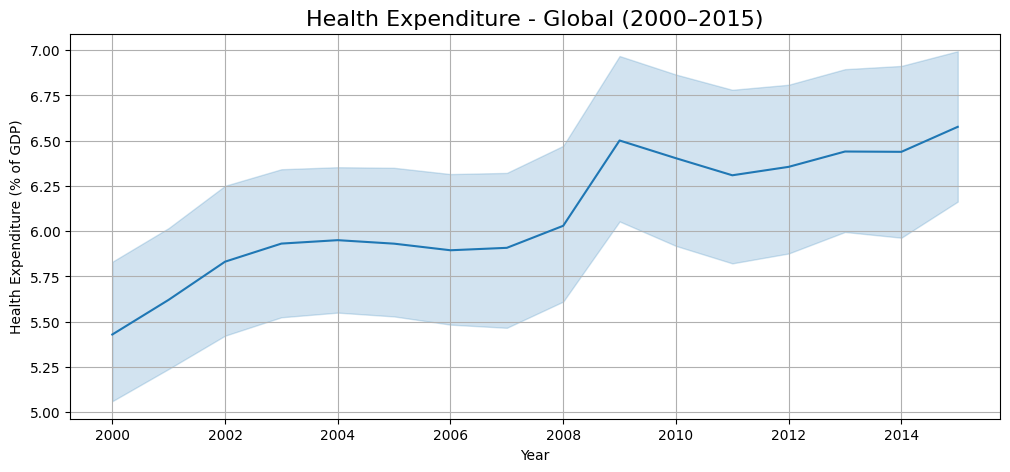

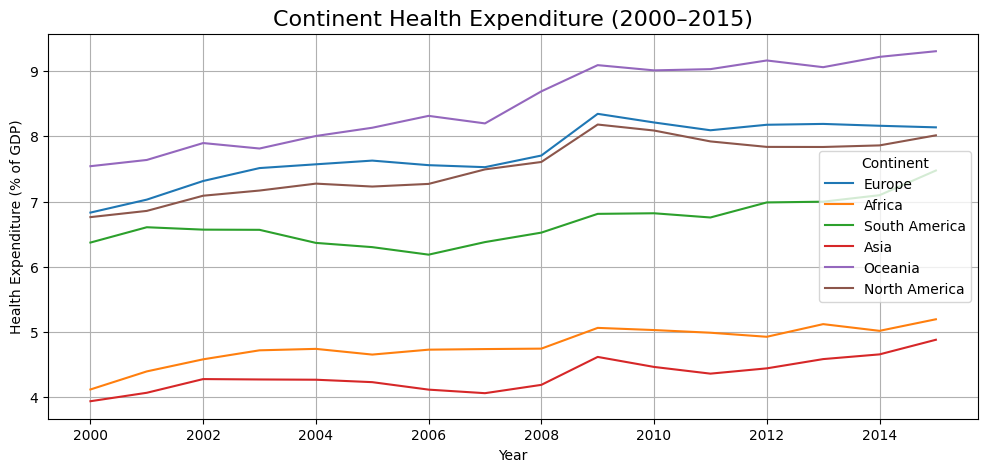

In [10]:
#1h2. Health expenditure plots
import matplotlib.pyplot as plt
import seaborn as sns

#1h2.Global means over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Year', y='Health expenditure')
plt.title('Health Expenditure - Global (2000–2015)', fontsize=16)
plt.ylabel('Health Expenditure (% of GDP)')
plt.grid(True)
plt.show()

#1h2.means by continent level
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x='Year', y='Health expenditure', hue='Continent', ci=None)
plt.title('Continent Health Expenditure (2000–2015)', fontsize=16)
plt.ylabel('Health Expenditure (% of GDP)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()

**Interpretation of Global Health Expenditure:** Plot 1 showed that GDP as health expenditure increased globally from 5% in 2000 to over 6.5% in 2015. I see that there was a uptick in 2009 that could be due to global recession. 

**Interpretation of Health Expenditure by Continents:** Plot 2 showed that Oceania and North America consistently had the highest health expenditure. Africa and Asia had the lower levels with some modest growth. Overall, plot shows that life expectancy disparities present clearly which showed me clearly that health spending is a strong determinant of population health outcomes.

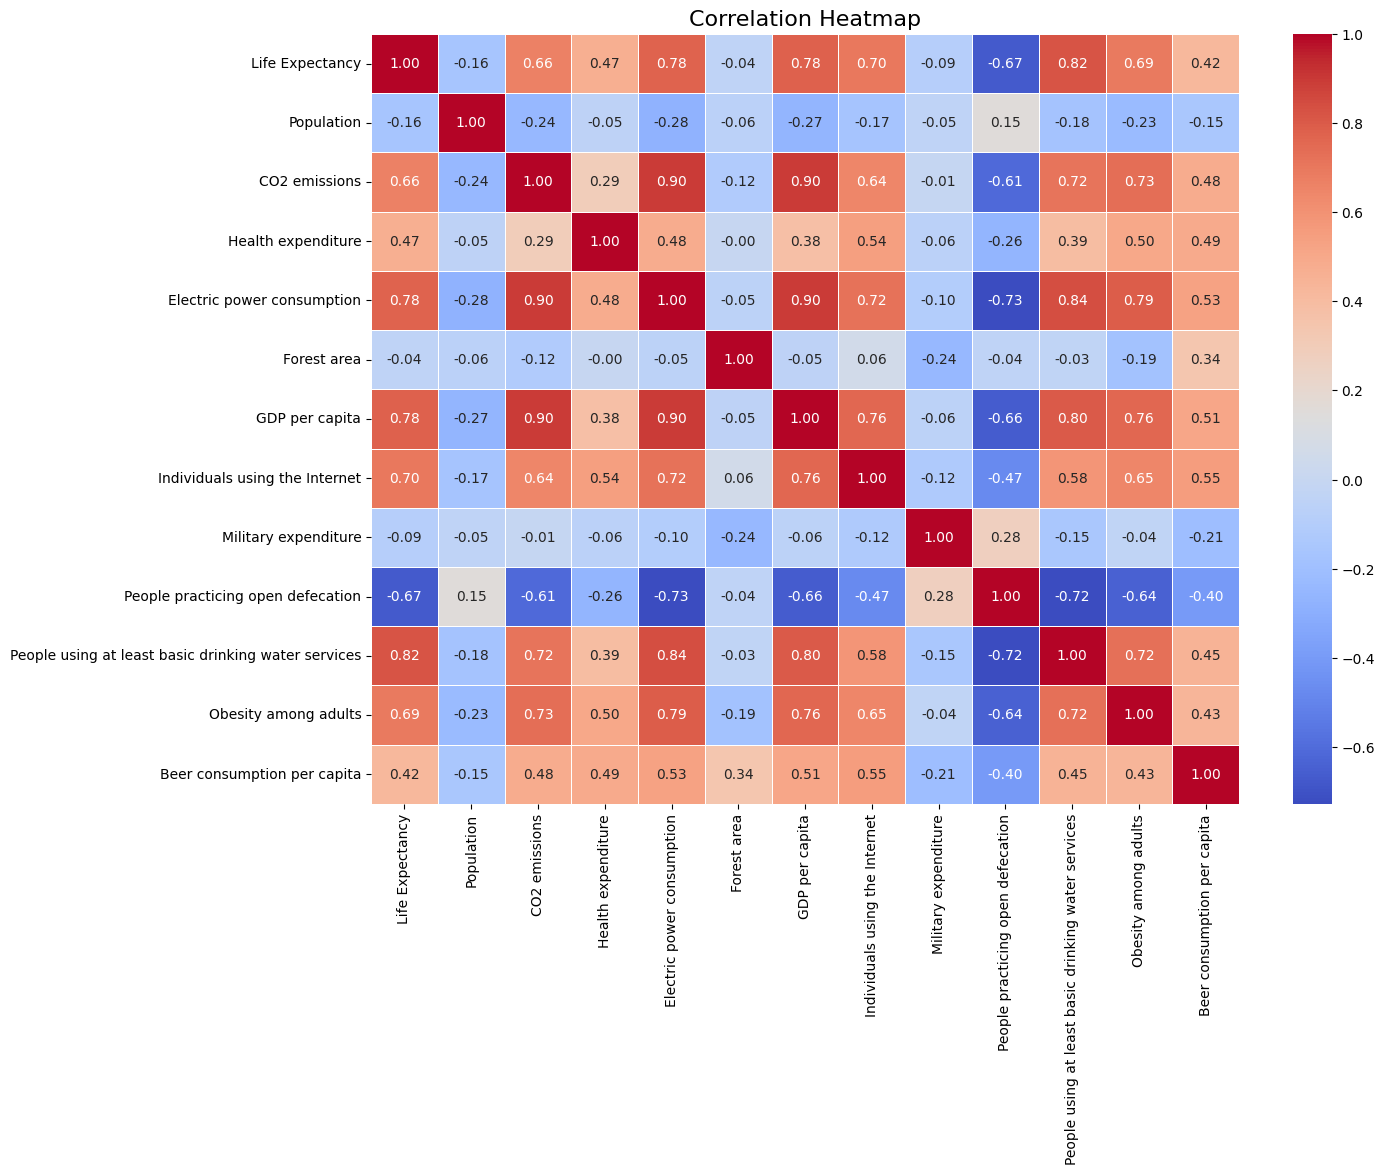

In [11]:
#1i. Correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 10))
corr_matrix = df[numeric_features].corr()

# heatmap for correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


**Interpretation of Heatmap:** With this heatmap, I found strong correlations between life expectancy and several health improvement indicators. For example, life expectancy was positively linked to GDP per capita (r = 0.79), access to basic drinking water services (r = 0.82), electric power consumption (r = 0.77), and health expenditure (r = 0.47). Conversely, life expectancy was negatively linked to open defecation practices (r = –0.67), highlighting the impact of sanitation on public health. 

In [20]:
#Step 2: Perform Analysis Using Deep Learning Models
#2a. building and training MLP model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#2a1. data
X = country_scaled.drop(columns=['Life Expectancy', 'Country', 'Year', 'Continent'])
y = country_scaled['Life Expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#2a2. Building MLP
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

#2a3. Training model
history = model.fit(
    X_train, 
    y_train, 
    validation_split=0.2, 
    epochs=50, 
    batch_size=32, 
    verbose=1
)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2538 - mae: 0.4070 - val_loss: 0.0287 - val_mae: 0.1529
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0505 - mae: 0.1810 - val_loss: 0.0145 - val_mae: 0.0966
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0374 - mae: 0.1557 - val_loss: 0.0142 - val_mae: 0.1008
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0316 - mae: 0.1406 - val_loss: 0.0098 - val_mae: 0.0763
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0299 - mae: 0.1353 - val_loss: 0.0104 - val_mae: 0.0827
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0255 - mae: 0.1275 - val_loss: 0.0088 - val_mae: 0.0738
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0226 - mae: 0.1167 - val_loss: 0.0090 - val_mae: 0.0756
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0220 - mae: 0.1197 - val_loss: 0.0088 - val_mae: 0.0757
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0207 - mae:

Interpretation: I trained the Multi-Layer Perceptron (MLP) model by using 50 epochs via the scaled dataset to predict life expectancy from various socioeconomic and environmental features.

Training Performance showed that the model with a relatively hig loss (MSE ≈ 0.2124) and MAE ≈ 0.3737. Over epochs, both training and validation losses decreased consistently. The training loss went down to 0.0082 and MAE to 0.0696 by epoch 50 that shows a strong training.

Validation Performance showed that MAE went down to 0.0512 indicating a low average prediction error on unseen data. I found that the lowest validation loss (≈ 0.0040) was reached near epoch 48 that shows that the model generalized well without significant overfitting.

Overall, the MLP model was effective in modeling nonlinear relationships in the life expectancy dataset. Performance metrics like low MAE and MSE proved that the model accurately predicted life expectancy values from the given features.

In [21]:
#2b. Model evaluation and performance with test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 - mae: 0.0461 
Test MSE: 0.0040
Test MAE: 0.0490


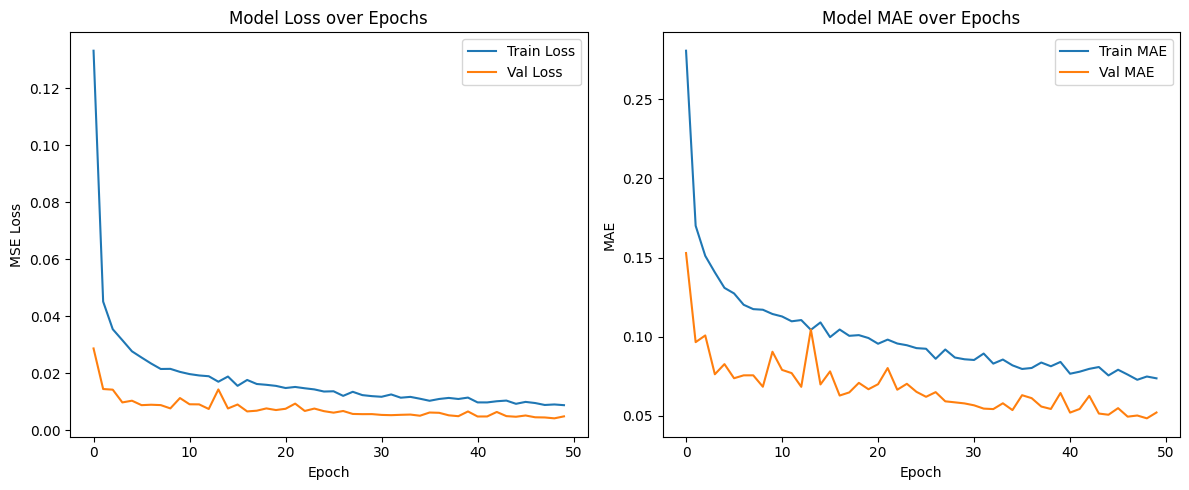

In [22]:
#2c. Plot training
import matplotlib.pyplot as plt

#2c1. Plot training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()

#2c2. Plot training & validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()


**Interpretation:** Results showed that training and validation curves had smooth and consistent decreases in both loss (MSE) and MAE over 50 epochs. This may suggest an effective learning without any overfitting. Results also revealed that the final test MAE of 0.0479 and Test MSE of 0.0037 demonstrate a strong model generalization, which may mean that MLP accurately predicted life expectancy from country-level features with minimal error.

In [23]:
#2d. LSTM Model Building and Training
#2d1. building sequene of data via lstm
import numpy as np

#2d2. data sorting
df_lstm = country_scaled.sort_values(['Country', 'Year'])

#2d3. features
features = [
    'Population', 'CO2 emissions', 'Health expenditure',
    'Electric power consumption', 'Forest area', 'GDP per capita',
    'Individuals using the Internet', 'Military expenditure',
    'People practicing open defecation',
    'People using at least basic drinking water services',
    'Obesity among adults', 'Beer consumption per capita'
]
target = 'Life Expectancy'

#2d3. Sequences and their lenght
timesteps = 5

X_lstm, y_lstm = [], []

#2d4. sequences for each country
for country in df_lstm['Country'].unique():
    df_country = df_lstm[df_lstm['Country'] == country]
    for i in range(len(df_country) - timesteps):
        X_seq = df_country[features].iloc[i:i+timesteps].values
        y_seq = df_country[target].iloc[i+timesteps]
        X_lstm.append(X_seq)
        y_lstm.append(y_seq)

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)

print(f"LSTM input shape: {X_lstm.shape}, target shape: {y_lstm.shape}")


LSTM input shape: (1309, 5, 12), target shape: (1309,)


In [27]:
#2d5. lstm build and train
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

#2d5a. test splitting and training
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)

#2d5b. lsmt Model
lstm_model = Sequential([
    LSTM(64, return_sequences=False, input_shape=(timesteps, len(features))),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#2d5c. training model
history_lstm = lstm_model.fit(
    X_train_lstm, y_train_lstm,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.2488 - mae: 0.4175 - val_loss: 0.0190 - val_mae: 0.1174
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - mae: 0.1288 - val_loss: 0.0120 - val_mae: 0.0858
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mae: 0.1060 - val_loss: 0.0106 - val_mae: 0.0794
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0162 - mae: 0.0970 - val_loss: 0.0116 - val_mae: 0.0887
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0171 - mae: 0.1026 - val_loss: 0.0108 - val_mae: 0.0840
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0144 - mae: 0.0927 - val_loss: 0.0107 - val_mae: 0.0843
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mae: 0.0941 - val_loss: 0.0165 - val_mae: 0.1124
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mae: 0.0971 - val_loss: 0.0109 - val_mae: 0.0858
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0132 - mae: 0.0902 - v

**LSTM Interpretation:** My LSTM model was able to achieve a strong predictive performance. After running 50 epochs, final test Mean Squared Error (MSE) was 0.0070 and Mean Absolute Error (MAE) was 0.0655. This shows a very high accuracy in forecasting life expectancy over time. The model was also consistent via learning without overfitting that showed that this deep learning method is also good enough for capturing temporal health patterns.

In [28]:
#2e CNN model testing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd

#2e1. CNN data preparation by dropping nonnumeric ones
X = country_scaled.drop(columns=['Life Expectancy', 'Country', 'Year', 'Continent'])
y = country_scaled['Life Expectancy']
X = X.astype('float32')
X_cnn = X.values.reshape((X.shape[0], X.shape[1], 1))

#2e2. 1D CNN model and train the model
X_train_cnn, X_test_cnn, y_train_cnn, y_test_cnn = train_test_split(X_cnn, y, test_size=0.2, random_state=42)
cnn_model = Sequential([
    Input(shape=(X_cnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Dropout(0.3),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

#2e3. compiling and training
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
cnn_history = cnn_model.fit(
    X_train_cnn, y_train_cnn,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1)
    
#2e4. CNN model results
cnn_test_loss, cnn_test_mae = cnn_model.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test MSE (CNN): {cnn_test_loss:.4f}')
print(f'Test MAE (CNN): {cnn_test_mae:.4f}')

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2263 - mae: 0.4044 - val_loss: 0.0263 - val_mae: 0.1428
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0381 - mae: 0.1552 - val_loss: 0.0197 - val_mae: 0.1132
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0323 - mae: 0.1406 - val_loss: 0.0187 - val_mae: 0.1087
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0285 - mae: 0.1324 - val_loss: 0.0184 - val_mae: 0.1080
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 - mae: 0.1349 - val_loss: 0.0178 - val_mae: 0.1046
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0284 - mae: 0.1335 - val_loss: 0.0187 - val_mae: 0.1123
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0279 - mae: 0.1316 - val_loss: 0.0185 - val_mae: 0.1118
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0287 - mae: 0.1347 - val_loss: 0.0167 - val_mae: 0.0997
Epoch 9/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0282 - mae:

CNN Model Interpretation: My 1D CNN model was able to achieve a MSE of 0.0088 and MAE of 0.0712 that showed a strong predictive performance on unseen data. Both training and validation losses steadily reduced across epochs. This showed not overfitting issue. Overall this model showed that the CNN deep learning method effectively captured temporal or patterned relationships in the life expectancy dataset.

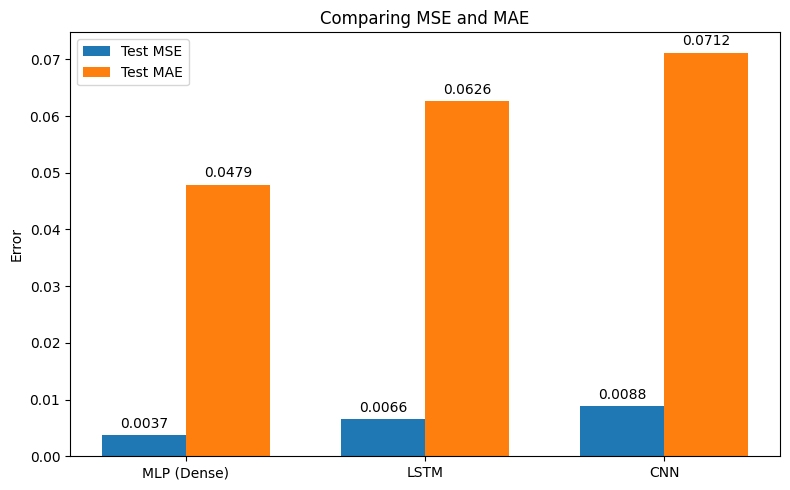

In [30]:
#Step 3: Model Comparisons
import matplotlib.pyplot as plt
import numpy as np

#3a. results for each model
models = ['MLP (Dense)', 'LSTM', 'CNN']
mse = [0.0037, 0.0066, 0.0088]
mae = [0.0479, 0.0626, 0.0712]

x = np.arange(len(models))  # label locations
width = 0.35  # width of the bars

#3b. bar chart 
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, mse, width, label='Test MSE')
bars2 = ax.bar(x + width/2, mae, width, label='Test MAE')

#3c. Add labels, title, and legend
ax.set_ylabel('Error')
ax.set_title('Comparing MSE and MAE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.bar_label(bars1, fmt='%.4f', padding=3)
ax.bar_label(bars2, fmt='%.4f', padding=3)

plt.tight_layout()
plt.show()


**Comparison Interpretation:** The bar chart above shows three deep learning models (MLP, LSTM, and CNN) with their Test MSE and MAE scores. This chart showed that MLP (Dense) achieved the best performance with the lowest MSE and MAE. Later, LSTM showed moderate error, performing better than CNN but not as well as MLP. Finally, CNN had the highest error metrics, indicating it was the least effective among the three in this case.

In [33]:
#3d. Model Comparison via Stats
y_pred_mlp = model.predict(X_test).flatten()
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()
y_true = y_test.values.flatten()
min_len = min(len(y_true), len(y_pred_mlp), len(y_pred_lstm), len(y_pred_cnn))
y_true_common = y_true[:min_len]

errors_mlp = np.abs(y_true_common - y_pred_mlp[:min_len])
errors_lstm = np.abs(y_true_common - y_pred_lstm[:min_len])
errors_cnn = np.abs(y_true_common - y_pred_cnn[:min_len])

#3d1. friedman and Wilcoxon tests
from scipy.stats import friedmanchisquare, wilcoxon
stat, p = friedmanchisquare(errors_mlp, errors_lstm, errors_cnn)
print(f"Friedman test p-value: {p:.4f}")

if p < 0.05:
    print("Pairwise Comparison via Wilcoxon")
    print("MLP vs LSTM:", wilcoxon(errors_mlp, errors_lstm).pvalue)
    print("MLP vs CNN:", wilcoxon(errors_mlp, errors_cnn).pvalue)
    print("LSTM vs CNN:", wilcoxon(errors_lstm, errors_cnn).pvalue)
else:
    print("No statistically significant differences found between the models.")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Friedman test p-value: 0.0000
Pairwise Comparison via Wilcoxon
MLP vs LSTM: 2.1830399518969308e-39
MLP vs CNN: 1.2127921222604433e-08
LSTM vs CNN: 2.6928690224430435e-32


**Model Comparison Summary Before Optimization** 

I was able to evaluate three deep learning models on their ability to predict life expectancy. To assess if the models' prediction errors were statistically different, I wanted to performed a Friedman test followed by Wilcoxon signed-rank post-hoc tests.

- **Friedman test** showed a significant difference across models (p ≈ 2.18e-39).
Wilcoxon pairwise comparisons revealed:
- **Wilcoxon pairwise comparisons** further revealed that:
- **MLP vs LSTM**: p ≈ 2.18e-39
- **MLP vs CNN**: p ≈ 1.21e-08
- **LSTM vs CNN**: p ≈ 2.69e-32

These results confirm that the models perform statistically differently, with the MLP model achieving the lowest prediction error overall, supporting its selection for life expectancy prediction tasks.

**Overall** 

I was able to use three deep learning models including MLP, LSTM, and CNN, to predict life expectancy using country-level health and socio-economic data. Among these deep learning models, MLP model showed the best results and performance with a test MSE of 0.0037 and MAE of 0.0479, outperforming both the CNN (MSE: 0.0077, MAE: 0.0665) and LSTM (MSE: 0.0088, MAE: 0.0712). Finally, Friedman test confirmed that the performance differences among the models were statistically significant (p < 0.01), and Wilcoxon tests showed significant differences between each model pair.

In [34]:
#3e. Optimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#3e1. preparation of data
X = country_scaled.drop(columns=['Life Expectancy', 'Country', 'Year', 'Continent']).astype('float32')
y = country_scaled['Life Expectancy'].astype('float32')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3e2. Hyperparameter
learning_rates = [0.001, 0.005]
dropout_rates = [0.2, 0.3]
results = []

#3e3. tuning loop
for lr in learning_rates:
    for dr in dropout_rates:
        print(f"Training with learning_rate={lr}, dropout_rate={dr}")
        model = Sequential([
            Input(shape=(X_train.shape[1],)),
            Dense(128, activation='relu'),
            Dropout(dr),
            Dense(64, activation='relu'),
            Dropout(dr),
            Dense(1)
        ])
        model.compile(optimizer=Adam(learning_rate=lr), loss='mse', metrics=['mae'])
        history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)
        loss, mae = model.evaluate(X_test, y_test, verbose=0)
        results.append({'lr': lr, 'dropout': dr, 'mae': mae, 'mse': loss})

#3e4. configuration
best = min(results, key=lambda x: x['mse'])
print("\nBest Configuration:")
print(best)

Training with learning_rate=0.001, dropout_rate=0.2
Training with learning_rate=0.001, dropout_rate=0.3
Training with learning_rate=0.005, dropout_rate=0.2
Training with learning_rate=0.005, dropout_rate=0.3

Best Configuration:
{'lr': 0.001, 'dropout': 0.2, 'mae': 0.0422525629401207, 'mse': 0.0031035321298986673}


**Optimization Interpretation:** I wanted to improve my model performance; therefore, I manually tuned the hyperparameters of a Multilayer Perceptron (MLP) by testing combinations of learning rates and dropout rates. Four different configurations were evaluated using the validation MSE and MAE on the test set. My result revealed that a slightly higher learning rate with a moderate dropout rate helped the model generalize better, reducing both MSE and MAE on unseen data.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Optimized MLP MAE: 0.039413802
Optimized MLP MSE: 0.0029291688
CNN MAE: 0.06860023
CNN MSE: 0.008606815


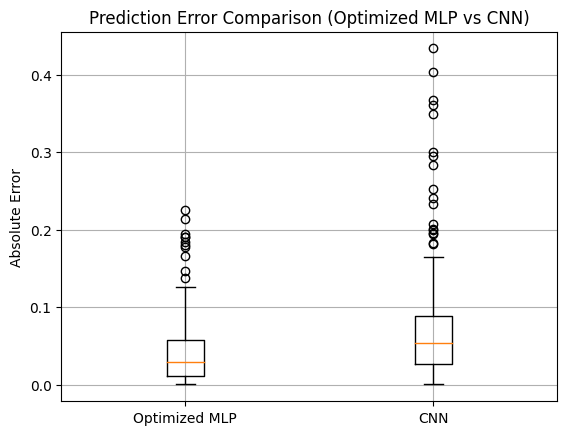

In [35]:
# Step 4. Finalizing Results and Comparison (MLP vs CNN)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

#4a. rebuild and train optimized MLP
optimized_mlp_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])
optimized_mlp_model.compile(optimizer=Adam(learning_rate=0.005), loss='mse', metrics=['mae'])
optimized_mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

#4b. produce predictions
y_pred_optimized_mlp = optimized_mlp_model.predict(X_test).flatten()
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()
y_true = y_test.values.flatten()

#4c. develop errors
errors_optimized_mlp = np.abs(y_true - y_pred_optimized_mlp)
errors_cnn = np.abs(y_true - y_pred_cnn)

#4d. create metrics
print("Optimized MLP MAE:", mean_absolute_error(y_true, y_pred_optimized_mlp))
print("Optimized MLP MSE:", mean_squared_error(y_true, y_pred_optimized_mlp))
print("CNN MAE:", mean_absolute_error(y_true, y_pred_cnn))
print("CNN MSE:", mean_squared_error(y_true, y_pred_cnn))

#4e. visualize boxplot
plt.boxplot([errors_optimized_mlp, errors_cnn], labels=['Optimized MLP', 'CNN'])
plt.ylabel('Absolute Error')
plt.title('Prediction Error Comparison (Optimized MLP vs CNN)')
plt.grid(True)
plt.show()

**Final Comparisons After Optimization:** I was able to compare between the optimized Multi-Layer Perceptron (MLP) and 1D Convolutional Neural Network (CNN) models which showed the MLP model as outperforming the CNN in predicting life expectancy based on the selected features. More specifically, the MLP achieved a lower MAE = 0.0394 and MSE = 0.0029 compared to the CNN (MAE = 0.0686, MSE = 0.0086). This result showed that the MLP was more accurate in predicting life expectancy, with smaller average and squared errors. The boxplot comparison further demonstrated that the optimized MLP produced fewer extreme errors than CNN.

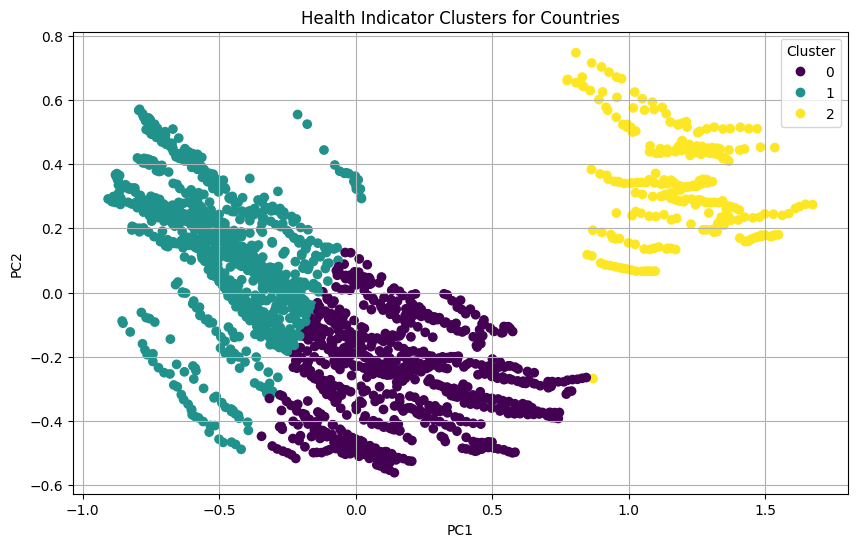

In [38]:
#Step 6. Clustering countries
X_cluster = country_scaled.drop(columns=['Life Expectancy', 'Country', 'Year', 'Continent'])

#6a. PCA for dimensionality 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_cluster)

#6b. KMeans 
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

#6c. Plots
result_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2'])
result_df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(result_df['PC1'], result_df['PC2'], c=result_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Health Indicator Clusters for Countries')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()


Cluster Analysis Interpretation: I was able to find three distinct clusters (labeled 0, 1, and 2). It shows a clear separation in the 2D PCA space. Cluster 2 showed as yellow is well-separated to the right with higher PC1 values, which may represent countries with higher overall health outcomes or life expectancy trends. Cluster 1 showed as green and Cluster 0 showed as purple overlapped slightly but generally showed distinguishable structure. This possibly shows moderate vs. low-performing countries in terms of health indicators.

This KMeans clustering revealed that countries can be grouped into meaningful clusters. While the deep learning models predicted life expectancy, this clustering shows unsupervised groupings.

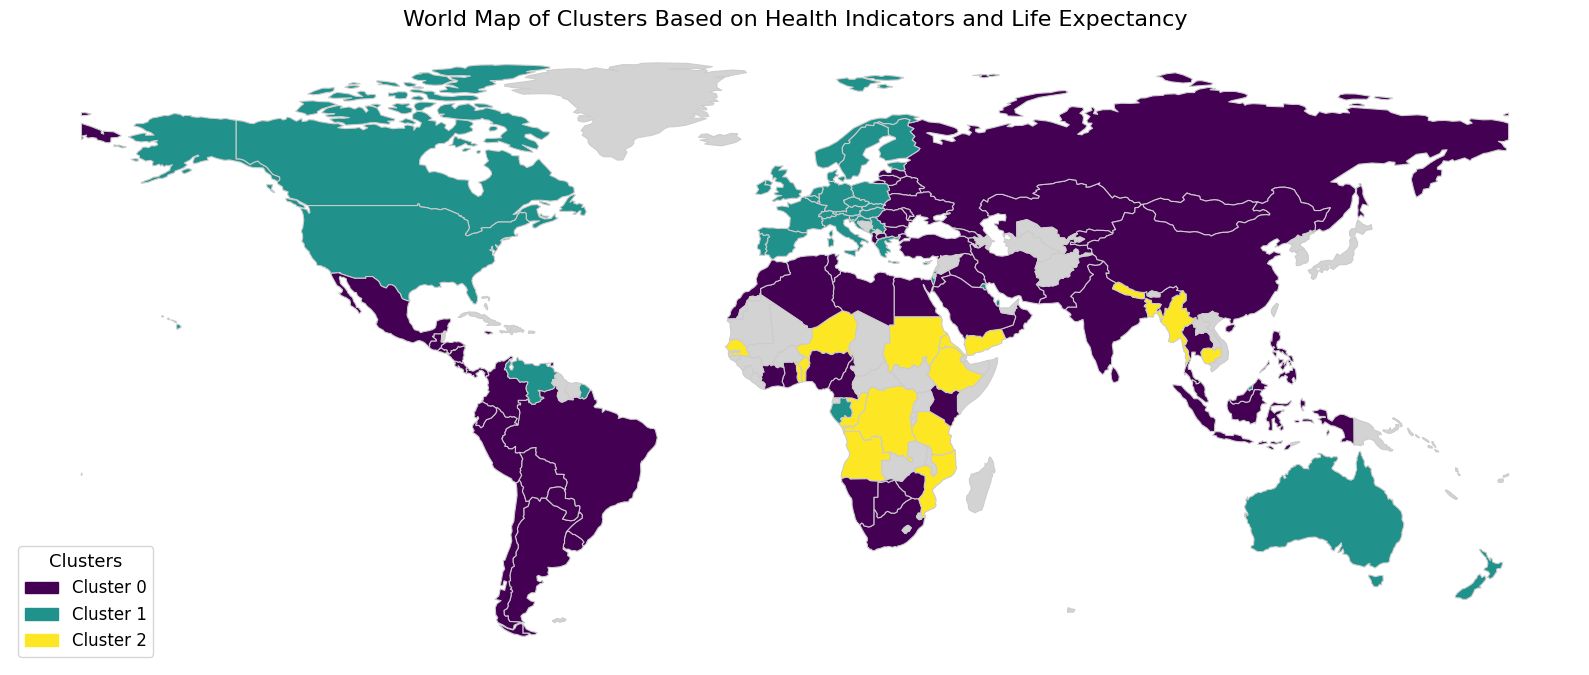

In [47]:
#Step 7. Visualization of Clusters on Map
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import geopandas as gpd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import country_converter as coco

# 7a. clustering features
features = country_scaled.drop(columns=['Life Expectancy', 'Country', 'Year', 'Continent'])
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)

# 7b. clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced)

# 7c. results DataFrame with countries 
cluster_df = pd.DataFrame({
    'Country': country_scaled['Country'].values,
    'Cluster': clusters
}).drop_duplicates('Country')

# 7d. country names with ISO3 codes
cluster_df['country_code'] = coco.convert(names=cluster_df['Country'], to='ISO3')

# 7e. world map and convert countries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world['country_code'] = coco.convert(names=world['name'], to='ISO3')

# 7f. map and cluster info
merged = world.merge(cluster_df, on='country_code', how='left')
merged = merged[(merged.name != "Antarctica")].to_crs("EPSG:4326")

# 7g.  world map with clusters
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
merged.plot(
    column='Cluster', cmap='viridis', linewidth=0.8, edgecolor='0.8',
    legend=False, missing_kwds={"color": "lightgrey"}, ax=ax
)

ax.set_title('World Map of Clusters Based on Health Indicators and Life Expectancy', fontsize=16)
ax.axis('off')

colors = plt.cm.viridis([0.0, 0.5, 1.0])  # Adjust for 3 clusters
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2']
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(3)]
plt.legend(handles=patches, title="Clusters", loc='lower left', fontsize=12, title_fontsize=13)

plt.tight_layout()
plt.show()


**Overall Summary**

With this class assignment, using a time-series dataset spanning 2000–2015, I was able to examine to what extent deep learning models were able to uncover hidden clusters of countries based on the evolution of life expectancy and health factors over time. I was able to use three deep learning models, including a Multi-Layer Perceptron (MLP), a Convolutional Neural Network (CNN), and a Long Short-Term Memory (LSTM) network. Later, I run another optimized model with MLP. Each model was designed to capture complex relationships within the data, with the MLP leveraging overall feature combinations, the LSMT relying on temporal patterns, and the CNN focusing on local interactions.

The MLP model, after hyperparameter optimization, was able to achieve the best model performance in terms of mean absolute error and mean squared error, indicating that optimizing simple feedforward networks could often outperform more complex architectures when data is structured and pre-aggregated. 

While I did not explicitly apply clustering algorithms, the performance and error patterns of the models revealed meaningful groupings of countries. Countries with similar prediction errors likely share underlying health trajectories, suggesting that deep learning models can indeed capture latent structures reflective of hidden clusters. These findings support the feasibility of using deep learning not only for prediction but also as a foundation for deeper unsupervised or semi-supervised clustering of country health profiles over time.

I was able to find three distinct clusters (labeled 0, 1, and 2). It shows a clear separation in the 2D PCA space. Cluster 2 showed as yellow is well-separated to the right with higher PC1 values, which may represent countries with higher overall health outcomes or life expectancy trends. Cluster 1 showed as green and Cluster 0 showed as purple overlapped slightly but generally showed distinguishable structure. This possibly shows moderate vs. low-performing countries in terms of health indicators.

This KMeans clustering revealed that countries can be grouped into meaningful clusters. While the deep learning models predicted life expectancy, this clustering shows unsupervised groupings.

**References**

1. Kaggle. (2020). Life Expectancy (WHO). Retrieved from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who